<div align='center'>
    <a href="https://ibb.co/MkJmkxM"><img src="https://i.ibb.co/4R0HRnP/hq720.jpg" alt="hq720" border="0"></a>
</div>

# [Project Content](#0)
* 1. [Introduction](#1)
    * 1.1 [Dataset Overview](#1.1)
    * 1.2 [Data Science Application](#1.2)
    * 1.3 [Source](#1.3)
* 2. [First Organization](#2)
    * 2.1 [Loading Basic Libraries](#2.1)
    * 2.2 [Loading Dataset](#2.2)
        * 2.2.1 [Getting to Know The Variables](#2.2.1)
    * 2.3 [First Evaluation Of Dataframe](#2.3)
        * 2.3.1 [Analysis Output](#2.3.1)
    * 2.4 [Analysis of Unique Values](#2.4)
* 3. [Data Cleaning](#3)
    * 3.1 [Type Variable](#3.1)
    * 3.2 [Year Variable](#3.2)
    * 3.3 [LastSoldOn Variable](#3.3)
    * 3.4 [Drop text Variable](#3.4)
* 4. [Data Analysis](#4)
    * 4.1 [Outliers](#4.1)
        * 4.1.1 [Remove Outliers](#4.1.1)
    * 4.2 [Distribution](#4.2)
    * 4.3 [Categorical Variable Analysis](#4.3)
    * 4.4 [4.4 Boxplot for listPrice Vs Other Variables](#4.4)
    * 4.5 [Violin plot](#4.5)
* 5. [Preparing Dataframe for Modelling](#5)
    * 5.1 [Spliting DataFrame to X, y](#5.1)
    * 5.2 [Linear Regression Assumtions](#5.2)
        * 5.2.1 [Linearity](#5.2.1)
        * 5.2.2 [Homoscedasticity ](#5.2.2)
        * 5.2.3 [Multivariate Normality](#5.2.3)
        * 5.2.4 [Autocorrelation](#5.2.4)
        * 5.2.5 [Multicollinearity](#5.2.5)
    * 5.3 [Correlation](#5.3)
    * 5.4 [Combine baths, baths_full, and baths_half into one feature](#5.4)
    * 5.4 [Correlation](#5.4)
    * 5.5 [Modelling](#5.5)
        * 5.5.1 [Import Libraries](#5.5.1)
        * 5.5.2 [Linear Regression](#5.5.2)
        * 5.5.3 [Ridge Regression](#5.5.3)
            * 5.5.3.1 [GridsearchCV ](#5.5.3.1)
        * 5.5.4 [Polynomial Regression](#5.5.4)
        * 5.5.5 [ElasticNet](#5.5.5)
            * 5.5.5.1 [GridSearchCV](#5.5.5.1)
        * 5.5.6 [RandomForest Regressor](#5.5.6)

In [1]:
# from google.colab import userdata
# import os

# os.environ["KAGGLE_PASS"] = userdata.get('KAGGLE_PASS')
# os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [2]:
# !kaggle datasets download -d kanchana1990/real-estate-data-utah-2024
# ! unzip "real-estate-data-utah-2024.zip"

# 1. Introduction <a id=1></a>

## 1.1 Dataset Overview <a id=1.1></a>

This dataset contains real estate listings from Utah, comprising 4,440 entries and 14 columns. The data includes various attributes of properties such as type, description, year built, number of bedrooms and bathrooms, garage spaces, lot size, square footage, stories, listing price, and the date the property was last sold. The data was ethically mined from Realtor.com using an API provided by Apify.

## 1.2 Data Science Applications <a id=1.2></a>

Given the size of the dataset (4,440 entries) and the available columns, this dataset is well-suited for various data science applications, including but not limited to:

**Regression Analysis**: Predict property listing prices based on features like square footage, number of bedrooms and bathrooms, year built, and lot size.

**Classification**: Classify properties into different types or price ranges.

**Time Series Analysis**: Analyze trends in property sales over time using the lastSoldOn column.

**Feature Engineering**: Create new features such as price per square foot or age of the property at the time of sale to enhance predictive models.

## 1.3 Source <a id=1.3></a>

The source of above content and dataset is from kaggle. You can get access to the dataset from this [Link](https://www.kaggle.com/datasets/kanchana1990/real-estate-data-utah-2024)

# 2. First Organization <a id=2></a>

## 2.1 Loading Basic Libraries <a id=2.1></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2.2 Loading Dataset <a id=2.2></a>

In [4]:
df = pd.read_csv("real_estate_utah.csv")

### 2.2.1 Getting to Know The Variables <a id=2.2.1></a>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4440 entries, 0 to 4439
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   type        4440 non-null   object 
 1   text        4440 non-null   object 
 2   year_built  4440 non-null   float64
 3   beds        4440 non-null   float64
 4   baths       4440 non-null   float64
 5   baths_full  4440 non-null   float64
 6   baths_half  4440 non-null   float64
 7   garage      4440 non-null   float64
 8   lot_sqft    4440 non-null   float64
 9   sqft        4440 non-null   float64
 10  stories     4440 non-null   float64
 11  lastSoldOn  4440 non-null   object 
 12  listPrice   4440 non-null   float64
 13  status      4440 non-null   object 
dtypes: float64(10), object(4)
memory usage: 485.8+ KB


| Column Name | Description                                            |
|-------------|--------------------------------------------------------|
| type        | Type of property (e.g., single_family, land)           |
| text        | Description of the property                            |
| year_built  | Year the property was built                            |
| beds        | Number of bedrooms                                     |
| baths       | Total number of bathrooms                              |
| baths_full  | Number of full bathrooms                               |
| baths_half  | Number of half bathrooms                               |
| garage      | Number of garage spaces                                |
| lot_sqft    | Lot size in square feet                                |
| sqft        | Property size in square feet                           |
| stories     | Number of stories                                      |
| lastSoldOn  | Date the property was last sold                        |
| listPrice   | Listing price of the property                          |
| status      | Current status of the property (e.g., for_sale)        |


# 2.3 First Evaluation Of DataFrame <a id=2.3></a>

In [6]:
df.head()

,type,text,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldOn,listPrice,status
0,single_family,"Escape to tranquility with this off-grid, unfi...",2020.0,1.0,1.0,1.0,1.0,2.0,71438.0,696.0,2.0,2018-05-31,90000.0,for_sale
1,single_family,Beautiful home in the desirable Oak Hills and ...,1968.0,4.0,3.0,2.0,1.0,2.0,56628.0,3700.0,2.0,2018-05-31,799000.0,for_sale
2,single_family,"Welcome to your new home, nestled in the heart...",1985.0,4.0,3.0,3.0,1.0,1.0,10019.0,3528.0,2.0,2018-05-31,389900.0,for_sale
3,single_family,Investment Opportunity. House needs some work ...,1936.0,4.0,2.0,2.0,1.0,2.0,12632.0,2097.0,2.0,2018-04-16,300000.0,for_sale
4,land,Deer Springs Ranch is an 8000 Ac Ranch in an H...,2003.0,4.0,0.0,2.0,1.0,2.0,872071.0,2400.0,2.0,2018-05-31,70000.0,for_sale


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4440 entries, 0 to 4439
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   type        4440 non-null   object 
 1   text        4440 non-null   object 
 2   year_built  4440 non-null   float64
 3   beds        4440 non-null   float64
 4   baths       4440 non-null   float64
 5   baths_full  4440 non-null   float64
 6   baths_half  4440 non-null   float64
 7   garage      4440 non-null   float64
 8   lot_sqft    4440 non-null   float64
 9   sqft        4440 non-null   float64
 10  stories     4440 non-null   float64
 11  lastSoldOn  4440 non-null   object 
 12  listPrice   4440 non-null   float64
 13  status      4440 non-null   object 
dtypes: float64(10), object(4)
memory usage: 485.8+ KB


In [8]:
df.isna().sum()

type          0
text          0
year_built    0
beds          0
baths         0
baths_full    0
baths_half    0
garage        0
lot_sqft      0
sqft          0
stories       0
lastSoldOn    0
listPrice     0
status        0
dtype: int64

In [9]:
df.shape

(4440, 14)

### 2.3.1 Analysis Output <a id=2.3.1></a>

**Analysis Output**:
* This dataset contains 4440 records within all variables, so there are no missing values
* There are 14 feature
* 10 features are with float datatype and 4 features are objects

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year_built,4440.0,1997.942793,2.360907e+01,1860.0,1997.0,2003.0,2007.0,2026.0
beds,4440.0,3.894595,1.265647e+00,1.0,3.0,4.0,4.0,19.0
baths,4440.0,2.454730,1.789238e+00,0.0,2.0,3.0,3.0,45.0
baths_full,4440.0,2.238964,1.165071e+00,1.0,2.0,2.0,3.0,45.0
baths_half,4440.0,1.025000,1.946716e-01,1.0,1.0,1.0,1.0,6.0
garage,4440.0,2.334234,1.024810e+00,0.0,2.0,2.0,2.0,20.0
lot_sqft,4440.0,552523.948649,1.134471e+07,436.0,9583.0,13939.0,24394.0,600953760.0
sqft,4440.0,2712.318243,1.553676e+03,0.0,1842.0,2400.0,3132.0,20905.0
stories,4440.0,1.999775,6.291342e-01,1.0,2.0,2.0,2.0,4.0
listPrice,4440.0,796604.380631,1.731703e+06,0.0,353805.0,528995.0,754900.0,48000000.0


## 2.4 Analysis Of Unique Values <a id=2.4></a>

In [11]:
pd.DataFrame(df.nunique(), columns=['Unique Values Count'])

,Unique Values Count
type,11
text,3991
year_built,140
beds,12
baths,16
baths_full,14
baths_half,5
garage,16
lot_sqft,554
sqft,2176


In [12]:
pd.DataFrame(df.type.value_counts())

,count
type,
single_family,2883
land,801
townhomes,344
mobile,206
condos,156
townhouse,14
other,12
farm,9
condo_townhome_rowhome_coop,8


In [13]:
pd.DataFrame(df.lastSoldOn.value_counts())

,count
lastSoldOn,
2018-05-31,2969
2022-07-01,5
2020-07-10,4
2020-06-26,4
2019-07-01,4
...,...
2018-08-30,1
2013-09-10,1
2012-08-14,1


In [14]:
pd.DataFrame(df.status.value_counts())

,count
status,
for_sale,4185
ready_to_build,255


In [15]:
pd.DataFrame(df.stories.value_counts())

,count
stories,
2.0,2794
1.0,842
3.0,767
4.0,37


In [16]:
pd.DataFrame(df.baths_half.value_counts())

,count
baths_half,
1.0,4352
2.0,69
3.0,17
6.0,1
4.0,1


# 3. Data Preprocessing <a id=3></a>

## 3.1 Type Variable
_Merge similar categories such as 'condos', 'condo_townhome_rowhome_coop', 'condo_townhome', and 'condo' into a single category._

In [17]:
type_mapping = {
    'single_family': 'single_family',
    'land': 'land',
    'townhomes': 'townhome',
    'townhouse': 'townhome',
    'mobile': 'mobile',
    'condos': 'condo',
    'condo_townhome_rowhome_coop': 'condo',
    'condo_townhome': 'condo',
    'condo': 'condo',
    'other': 'other',
    'farm': 'farm'
}

In [18]:
df['type'] = df['type'].map(type_mapping)

In [19]:
pd.DataFrame(df.type.value_counts())

,count
type,
single_family,2883
land,801
townhome,358
mobile,206
condo,171
other,12
farm,9


## 3.2 Year Variable <a id=3.2></a>
_Correcting its datatype to integer_

In [20]:
df['year_built'] = df['year_built'].astype('int')

## 3.3 LastSoldOn Variable <a id=3.4></a>
_Changing datatype to datetime format_

In [21]:
df['lastSoldOn'] = pd.to_datetime(df['lastSoldOn'])

In [22]:
df.info() # To validate previous changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4440 entries, 0 to 4439
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   type        4440 non-null   object        
 1   text        4440 non-null   object        
 2   year_built  4440 non-null   int32         
 3   beds        4440 non-null   float64       
 4   baths       4440 non-null   float64       
 5   baths_full  4440 non-null   float64       
 6   baths_half  4440 non-null   float64       
 7   garage      4440 non-null   float64       
 8   lot_sqft    4440 non-null   float64       
 9   sqft        4440 non-null   float64       
 10  stories     4440 non-null   float64       
 11  lastSoldOn  4440 non-null   datetime64[ns]
 12  listPrice   4440 non-null   float64       
 13  status      4440 non-null   object        
dtypes: datetime64[ns](1), float64(9), int32(1), object(3)
memory usage: 468.4+ KB


## 3.4 Drop text Variable <a id=3.3></a>

In [23]:
df.drop(columns=['text'], axis=1, inplace=True)

In [24]:
df.head()

,type,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldOn,listPrice,status
0,single_family,2020,1.0,1.0,1.0,1.0,2.0,71438.0,696.0,2.0,2018-05-31,90000.0,for_sale
1,single_family,1968,4.0,3.0,2.0,1.0,2.0,56628.0,3700.0,2.0,2018-05-31,799000.0,for_sale
2,single_family,1985,4.0,3.0,3.0,1.0,1.0,10019.0,3528.0,2.0,2018-05-31,389900.0,for_sale
3,single_family,1936,4.0,2.0,2.0,1.0,2.0,12632.0,2097.0,2.0,2018-04-16,300000.0,for_sale
4,land,2003,4.0,0.0,2.0,1.0,2.0,872071.0,2400.0,2.0,2018-05-31,70000.0,for_sale


# 4. Data Analysis <a id=4>

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4440 entries, 0 to 4439
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   type        4440 non-null   object        
 1   year_built  4440 non-null   int32         
 2   beds        4440 non-null   float64       
 3   baths       4440 non-null   float64       
 4   baths_full  4440 non-null   float64       
 5   baths_half  4440 non-null   float64       
 6   garage      4440 non-null   float64       
 7   lot_sqft    4440 non-null   float64       
 8   sqft        4440 non-null   float64       
 9   stories     4440 non-null   float64       
 10  lastSoldOn  4440 non-null   datetime64[ns]
 11  listPrice   4440 non-null   float64       
 12  status      4440 non-null   object        
dtypes: datetime64[ns](1), float64(9), int32(1), object(2)
memory usage: 433.7+ KB


## 4.1 Outliers <a id-4.></a>

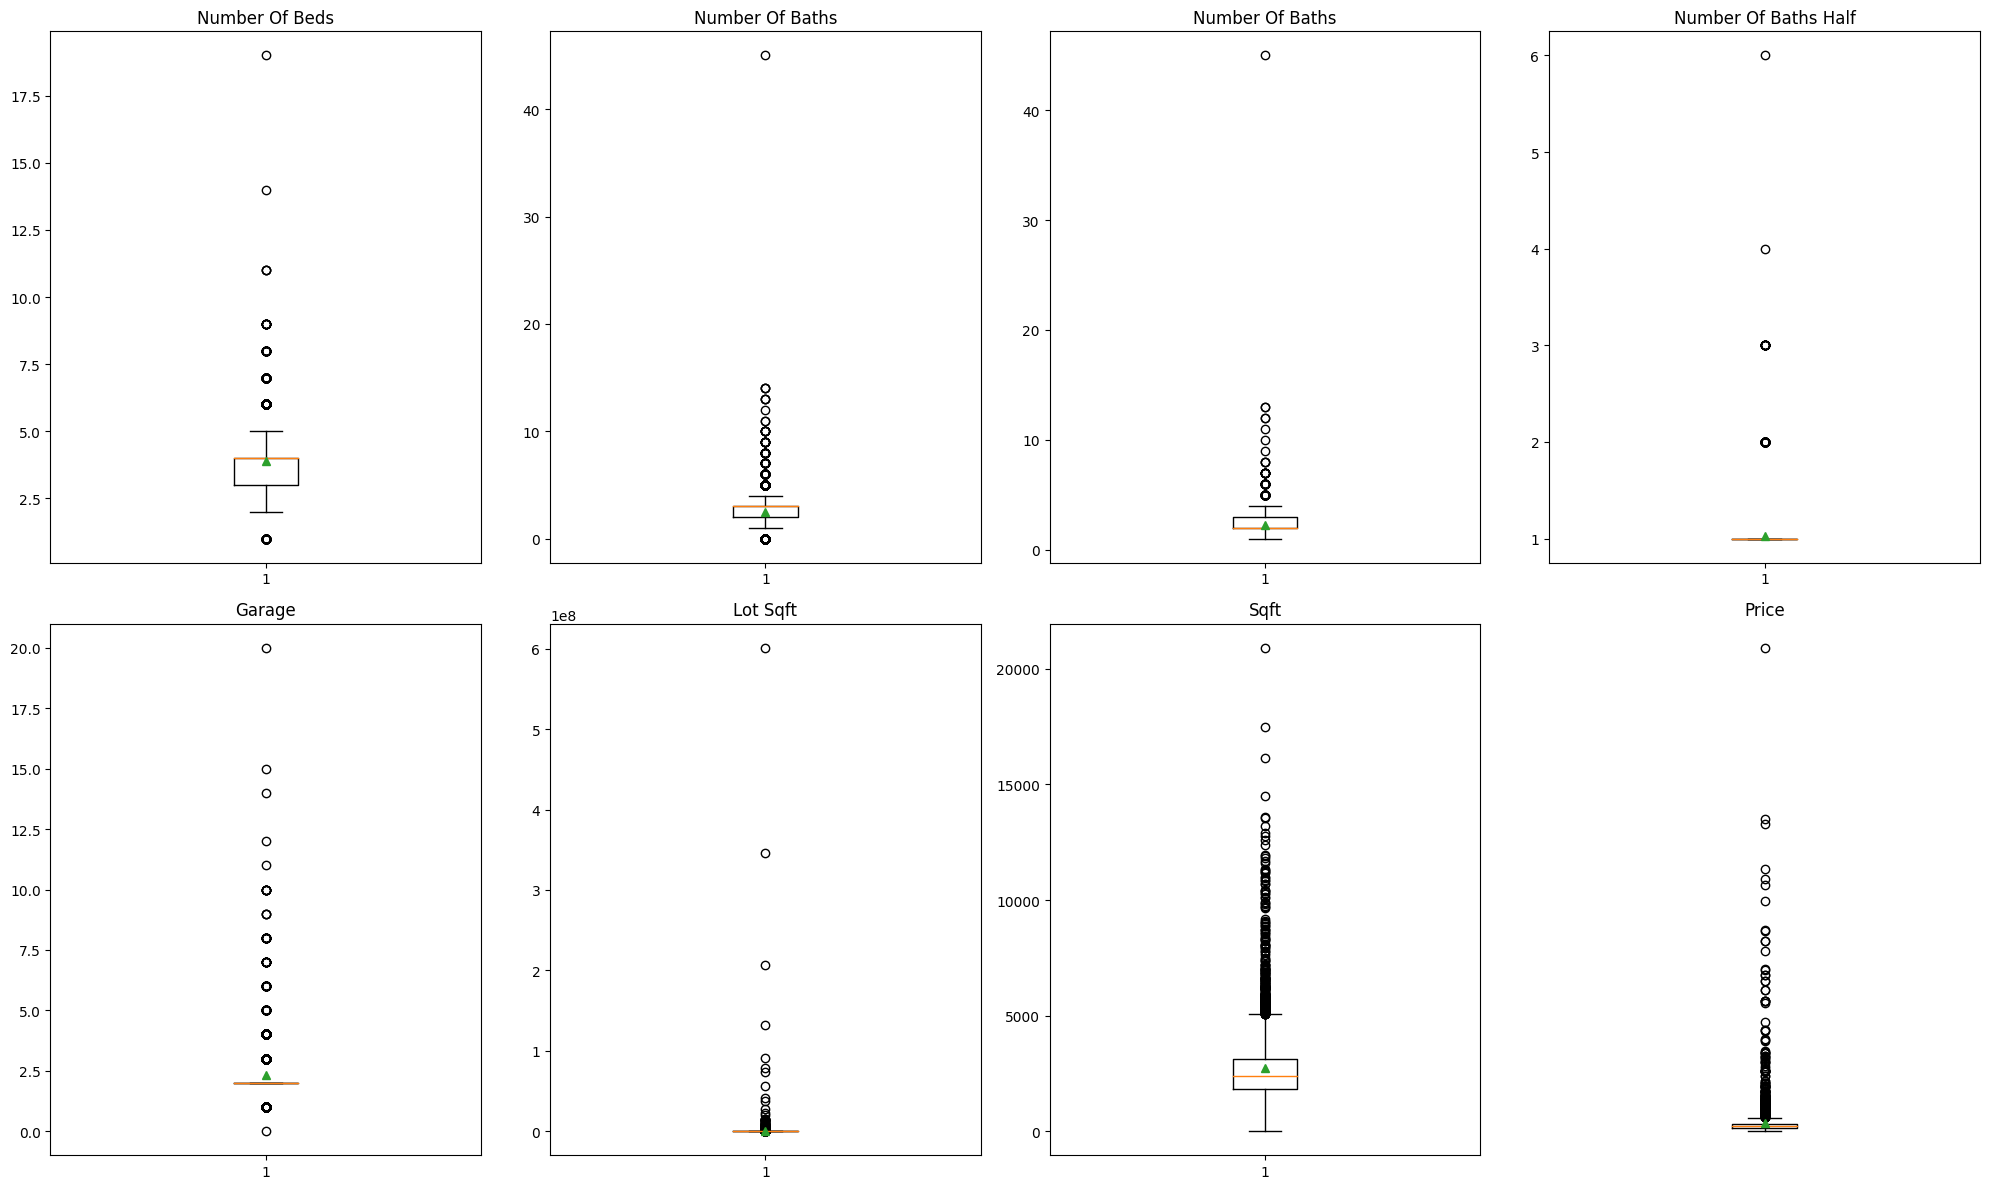

In [26]:
fig, ((ax1, ax2, ax3, ax4), (ax5 ,ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(20, 12))

ax1.boxplot(df["beds"], showmeans=True)
ax1.set_title("Number Of Beds")

ax2.boxplot(df["baths"], showmeans=True)
ax2.set_title("Number Of Baths")

ax3.boxplot(df["baths_full"], showmeans=True)
ax3.set_title("Number Of Baths")

ax4.boxplot(df["baths_half"], showmeans=True)
ax4.set_title("Number Of Baths Half")

ax5.boxplot(df["garage"], showmeans=True)
ax5.set_title("Garage")

ax6.boxplot(df["lot_sqft"], showmeans=True)
ax6.set_title("Lot Sqft")

ax7.boxplot(df["sqft"], showmeans=True)
ax7.set_title("Sqft")

ax8.boxplot(df["listPrice"], showmeans=True)
ax8.set_title("Price")


# Hide the extra subplot
ax8.axis('off')

plt.tight_layout()
plt.show()


## 4.1.1 Remove Outliers <a id=4.1.1></a>

In [27]:
def remove_outliers_iqr(df, columns):
    """
    Remove outliers from the specified columns in the DataFrame using the IQR technique.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): A list of column names to check for outliers.

    Returns:
    pd.DataFrame: A DataFrame with outliers removed.
    """
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)

        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

In [28]:
columns_to_check = ['beds', 'baths', 'sqft', 'listPrice']
df = remove_outliers_iqr(df, columns_to_check)

In [29]:
df.info() # To validate changes

<class 'pandas.core.frame.DataFrame'>
Index: 3445 entries, 1 to 4437
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   type        3445 non-null   object        
 1   year_built  3445 non-null   int32         
 2   beds        3445 non-null   float64       
 3   baths       3445 non-null   float64       
 4   baths_full  3445 non-null   float64       
 5   baths_half  3445 non-null   float64       
 6   garage      3445 non-null   float64       
 7   lot_sqft    3445 non-null   float64       
 8   sqft        3445 non-null   float64       
 9   stories     3445 non-null   float64       
 10  lastSoldOn  3445 non-null   datetime64[ns]
 11  listPrice   3445 non-null   float64       
 12  status      3445 non-null   object        
dtypes: datetime64[ns](1), float64(9), int32(1), object(2)
memory usage: 363.3+ KB


## 4.2 Distribution <a id=4.2></a>

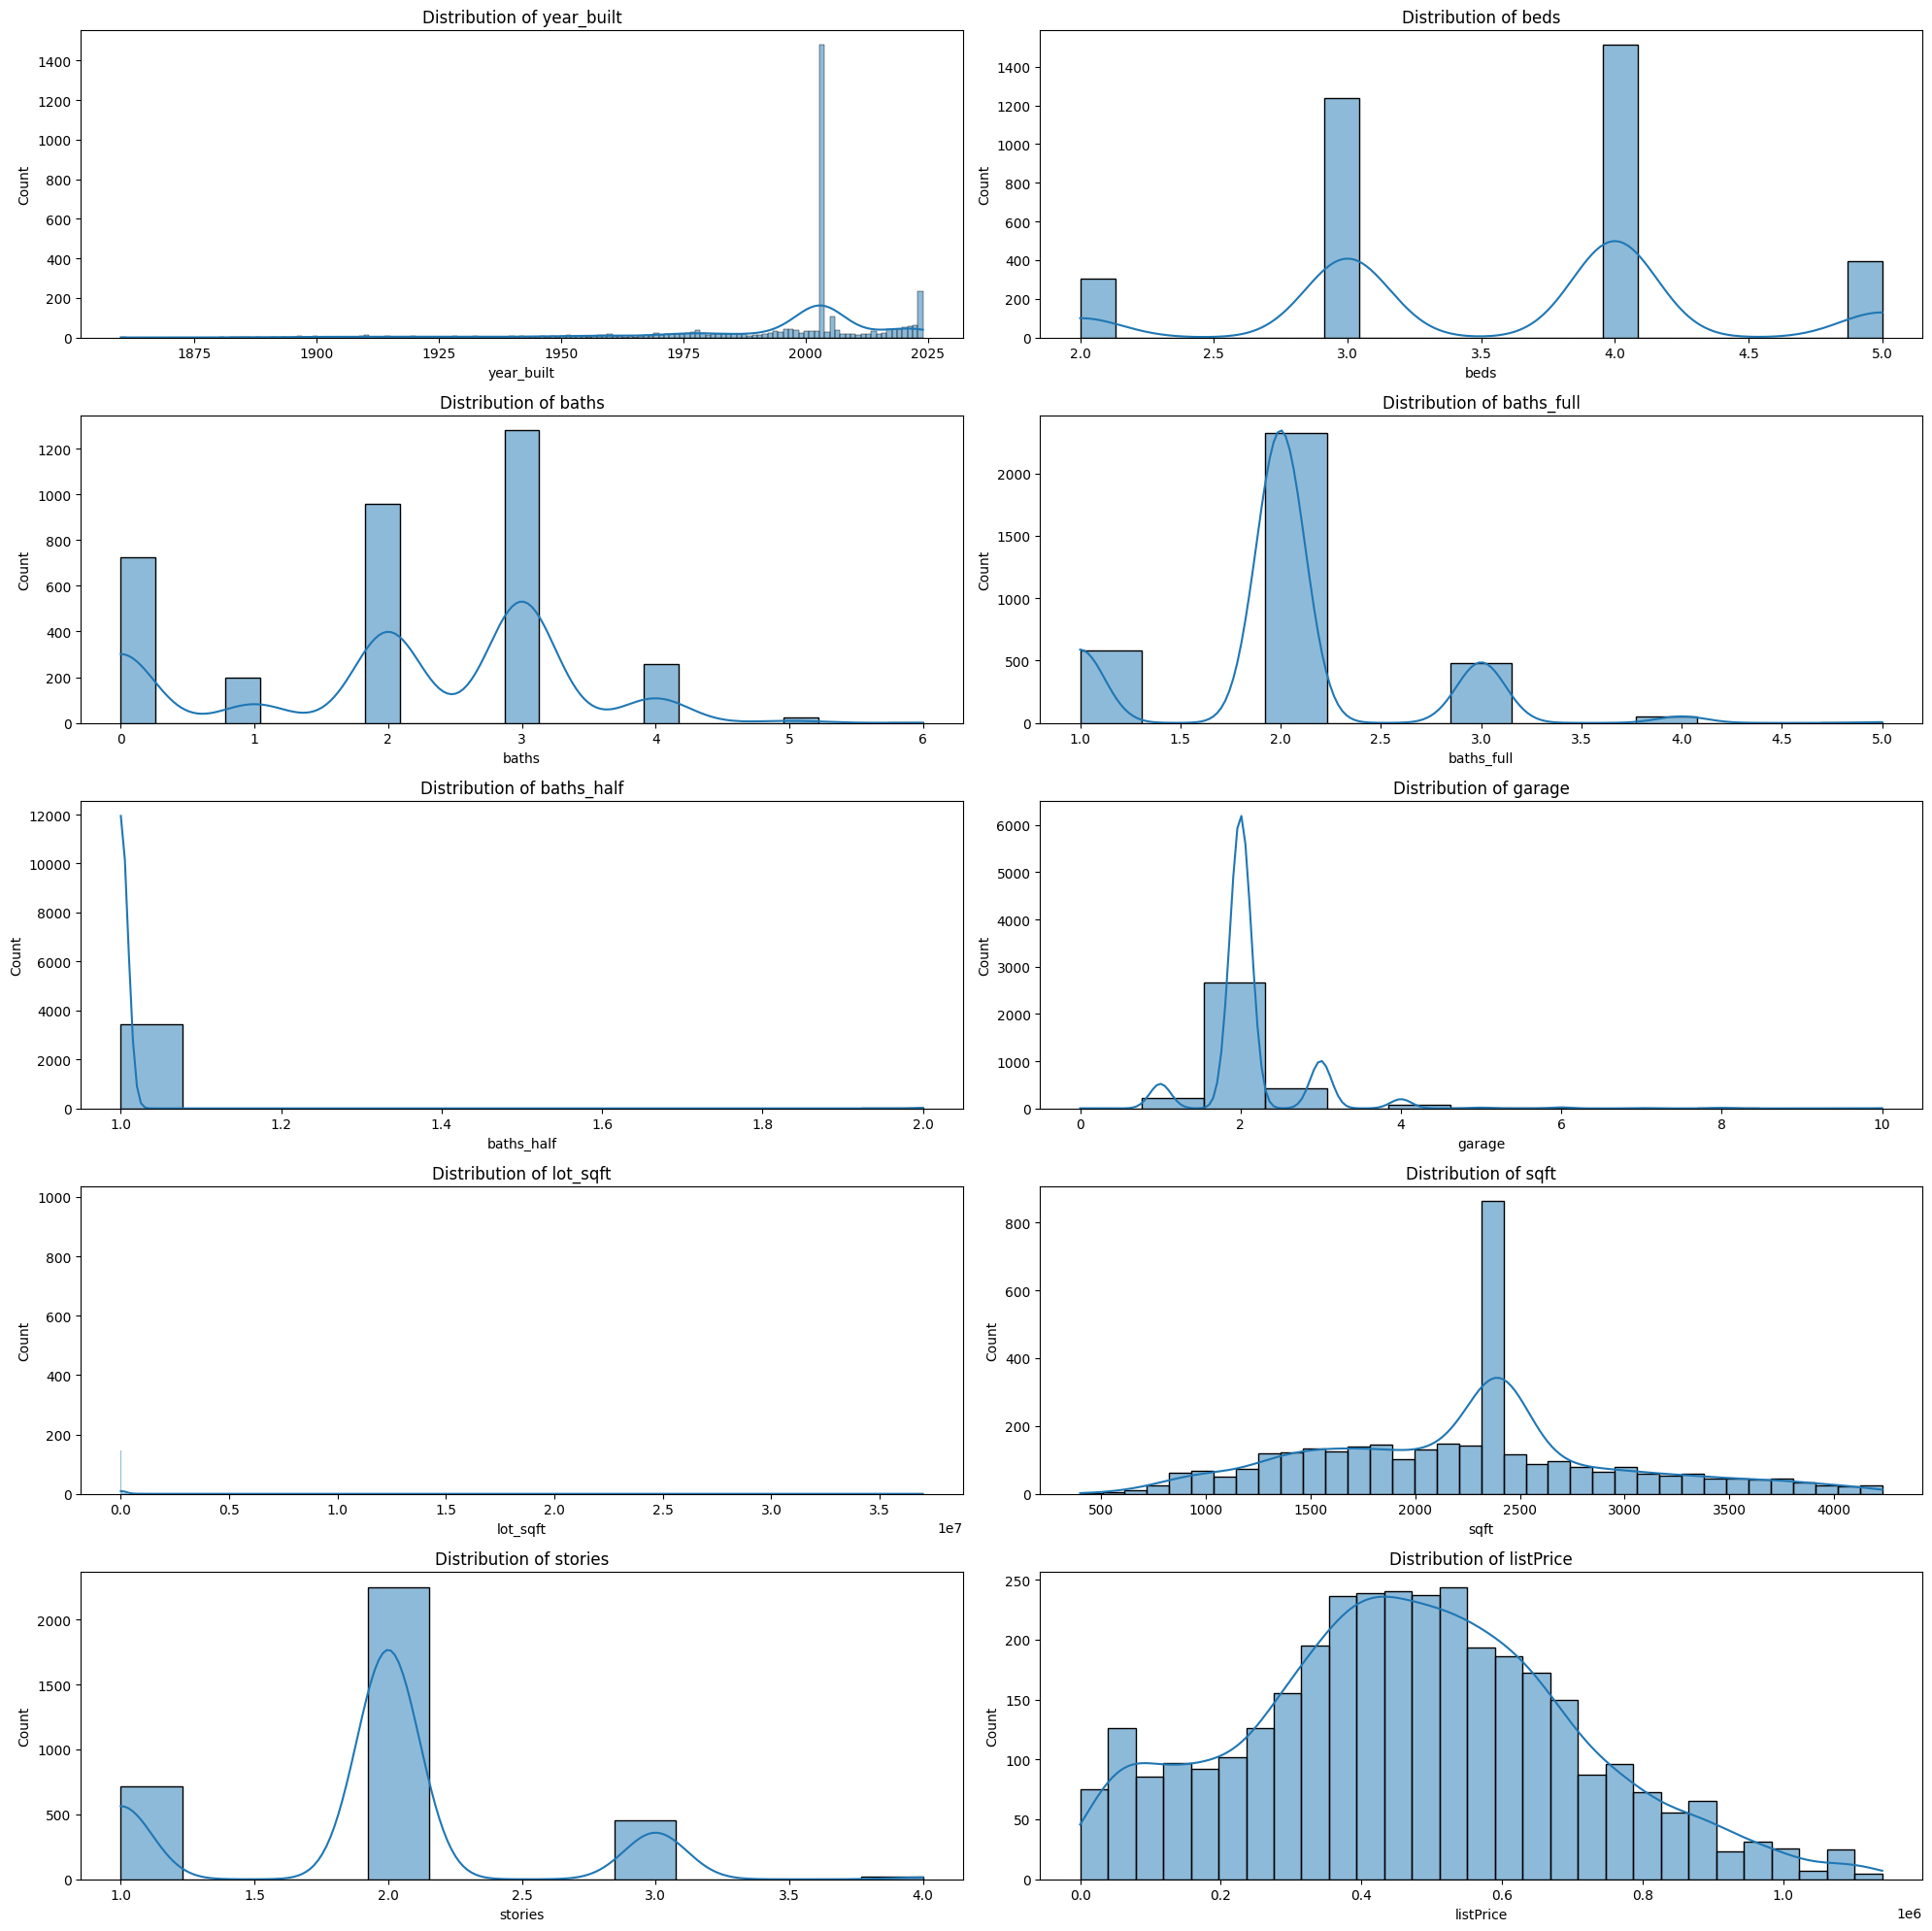

In [30]:
# Plotting the distribution of numeric features
numeric_columns = ['year_built', 'beds', 'baths', 'baths_full', 'baths_half', 'garage', 'lot_sqft', 'sqft', 'stories', 'listPrice']

plt.figure(figsize=(20, 20))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

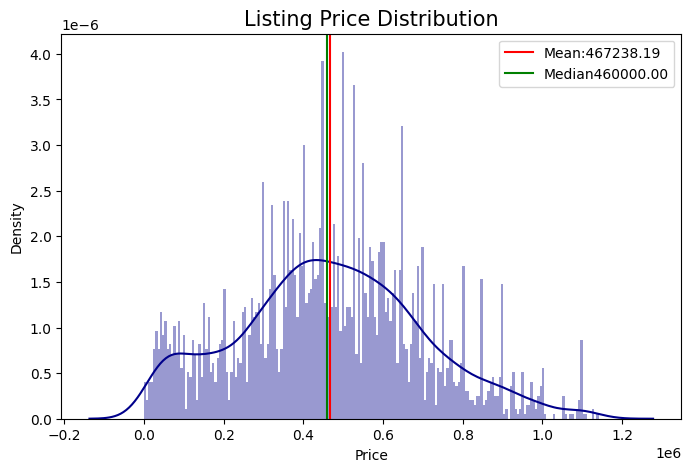

In [31]:
mean = df['listPrice'].mean()
median = df['listPrice'].median()

plt.figure(figsize=(8, 5))
sns.distplot(bins=200, x=df['listPrice'], color='darkblue')
plt.axvline(mean, color='red', label=f'Mean:{mean:.2f}')
plt.axvline(median, color='green', label=f'Median{median:.2f}')
plt.title("Listing Price Distribution", fontsize=15)
plt.xlabel("Price", fontsize=10)
plt.legend()
plt.show()

In [32]:
# df['listPrice'] = np.log1p(df['listPrice'])

In [33]:
df.listPrice.skew()

0.17023735060062958

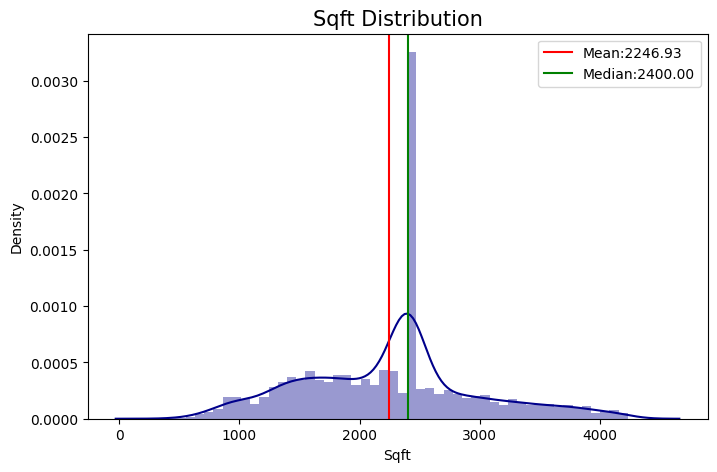

In [34]:
mean = df['sqft'].mean()
median = df['sqft'].median()

plt.figure(figsize=(8, 5))
sns.distplot(bins=50, x=df['sqft'], color='darkblue')
plt.axvline(mean, color='red', label=f'Mean:{mean:.2f}')
plt.axvline(median, color='green', label=f'Median:{median:.2f}')
plt.title("Sqft Distribution", fontsize=15)
plt.xlabel("Sqft", fontsize=10)
plt.legend()
plt.show()

In [35]:
# df['sqft'] = np.log1p(df['sqft'])

In [36]:
df['sqft'].skew()

0.27352669247192507

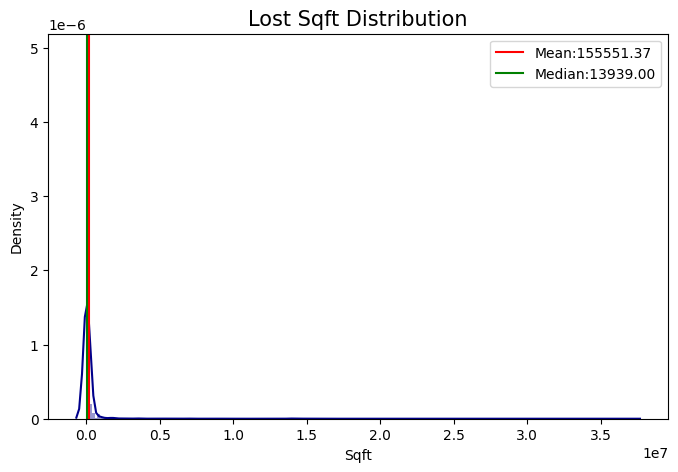

In [37]:
mean = df['lot_sqft'].mean()
median = df['lot_sqft'].median()

plt.figure(figsize=(8, 5))
sns.distplot(bins=200, x=df['lot_sqft'], color='darkblue')
plt.axvline(mean, color='red', label=f'Mean:{mean:.2f}')
plt.axvline(median, color='green', label=f'Median:{median:.2f}')
plt.title("Lost Sqft Distribution", fontsize=15)
plt.xlabel("Sqft", fontsize=10)
plt.legend()
plt.show()

In [38]:
df['lot_sqft'].skew()

17.149289712606272

In [39]:
df['lot_sqft'] = np.log1p(df['lot_sqft'])

## 4.3 Categorical Variable Analysis <a id=4.3></a>

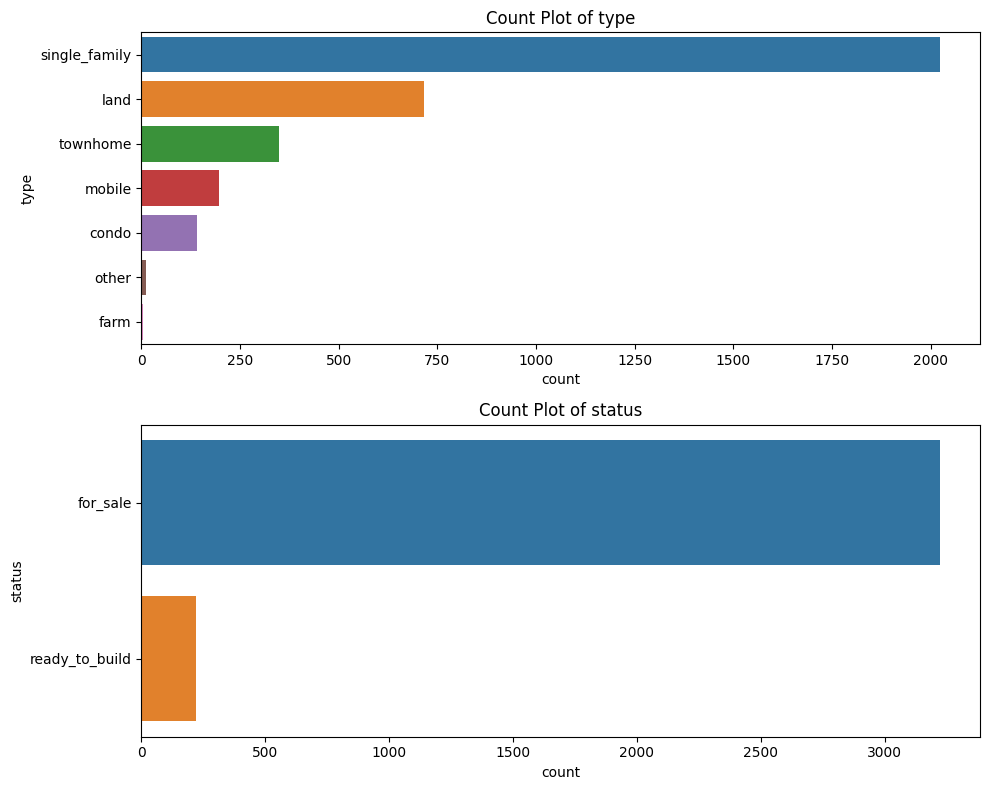

In [40]:
# Count plot for 'type' and 'status'
categorical_columns = ['type', 'status']

plt.figure(figsize=(10, 8))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 1, i)
    sns.countplot(y=df[column], order=df[column].value_counts().index)
    plt.title(f'Count Plot of {column}')
plt.tight_layout()
plt.show()

## 4.4 Boxplot for listPrice Vs Other Variables <a id=4.4></a>

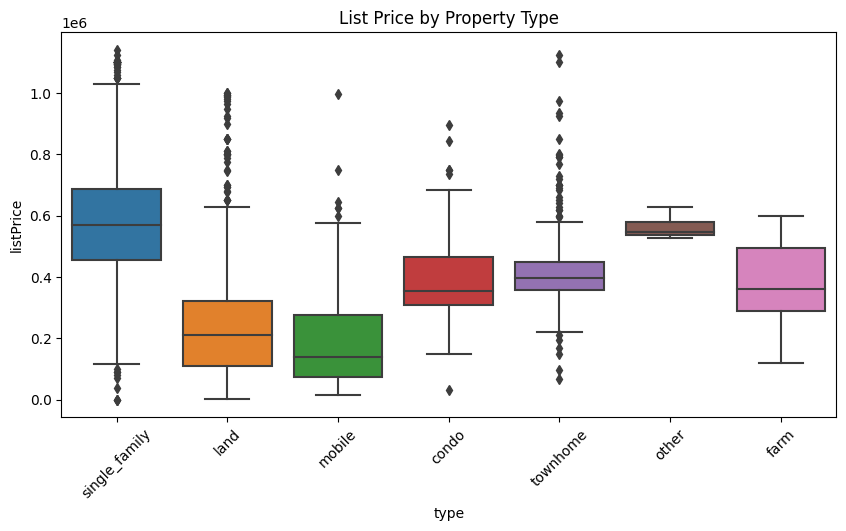

In [41]:
# Boxplot for 'listPrice' vs 'type'
plt.figure(figsize=(10, 5))
sns.boxplot(x='type', y='listPrice', data=df)
plt.title('List Price by Property Type')
plt.xticks(rotation=45)
plt.show()

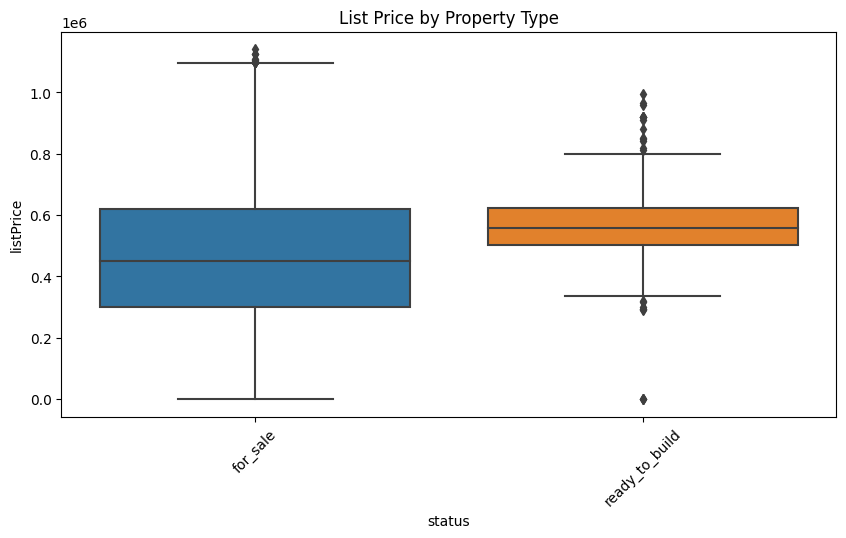

In [42]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='status', y='listPrice', data=df)
plt.title('List Price by Property Type')
plt.xticks(rotation=45)
plt.show()

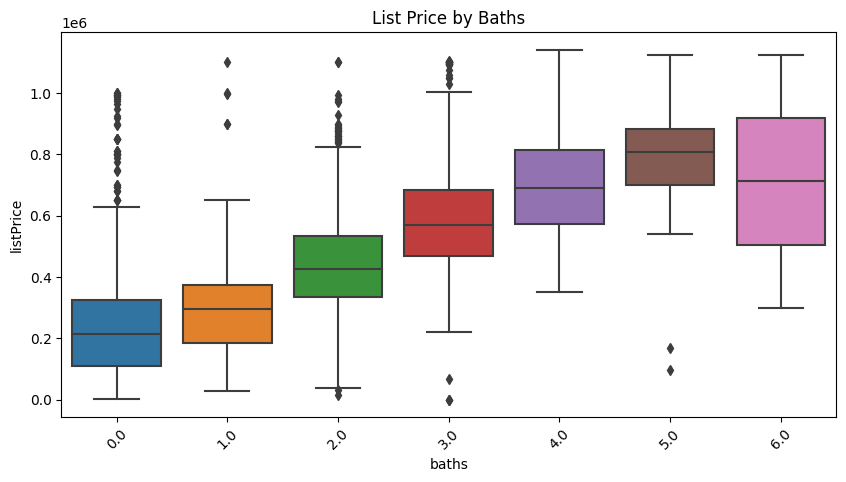

In [43]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='baths', y='listPrice', data=df)
plt.title('List Price by Baths')
plt.xticks(rotation=45)
plt.show()

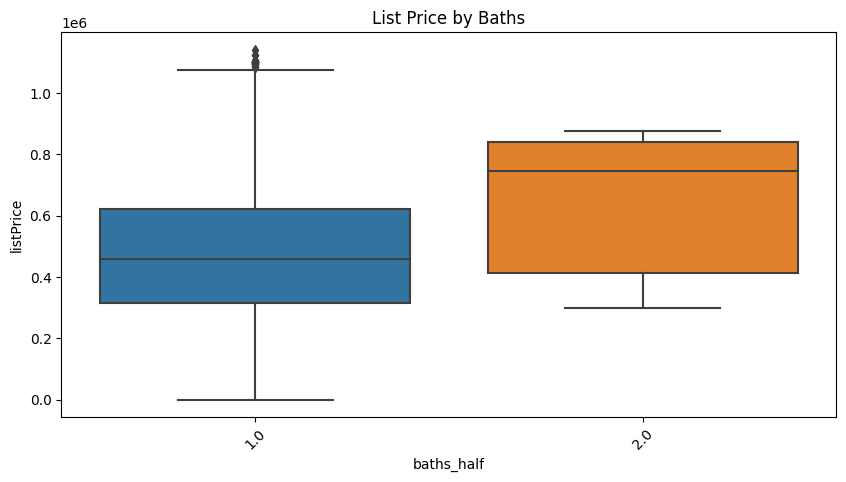

In [44]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='baths_half', y='listPrice', data=df)
plt.title('List Price by Baths')
plt.xticks(rotation=45)
plt.show()

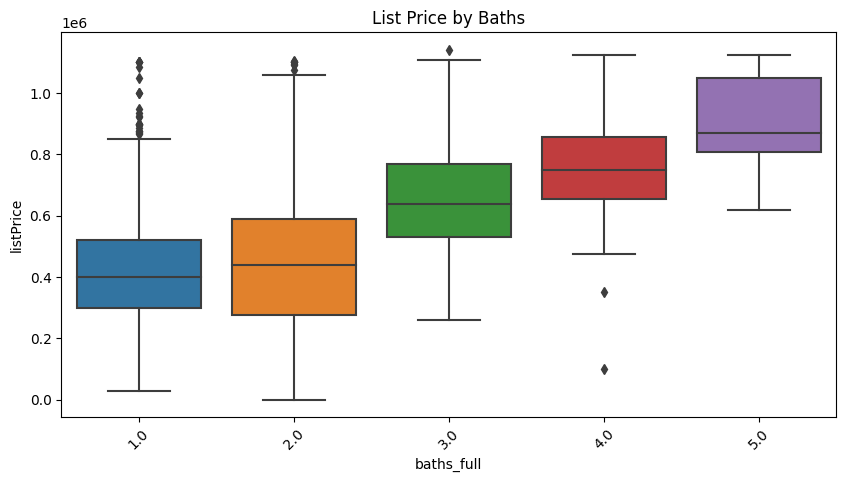

In [45]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='baths_full', y='listPrice', data=df)
plt.title('List Price by Baths')
plt.xticks(rotation=45)
plt.show()

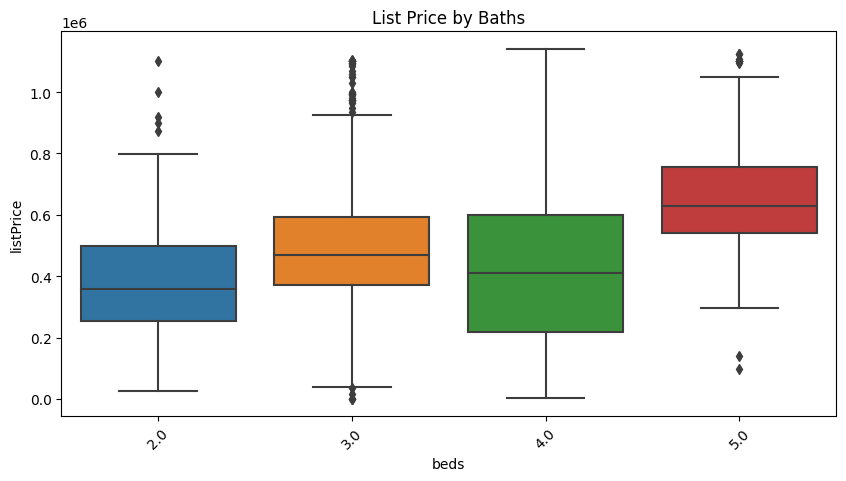

In [46]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='beds', y='listPrice', data=df)
plt.title('List Price by Baths')
plt.xticks(rotation=45)
plt.show()

## 4.5 Violin plot <a id=4.5></a>

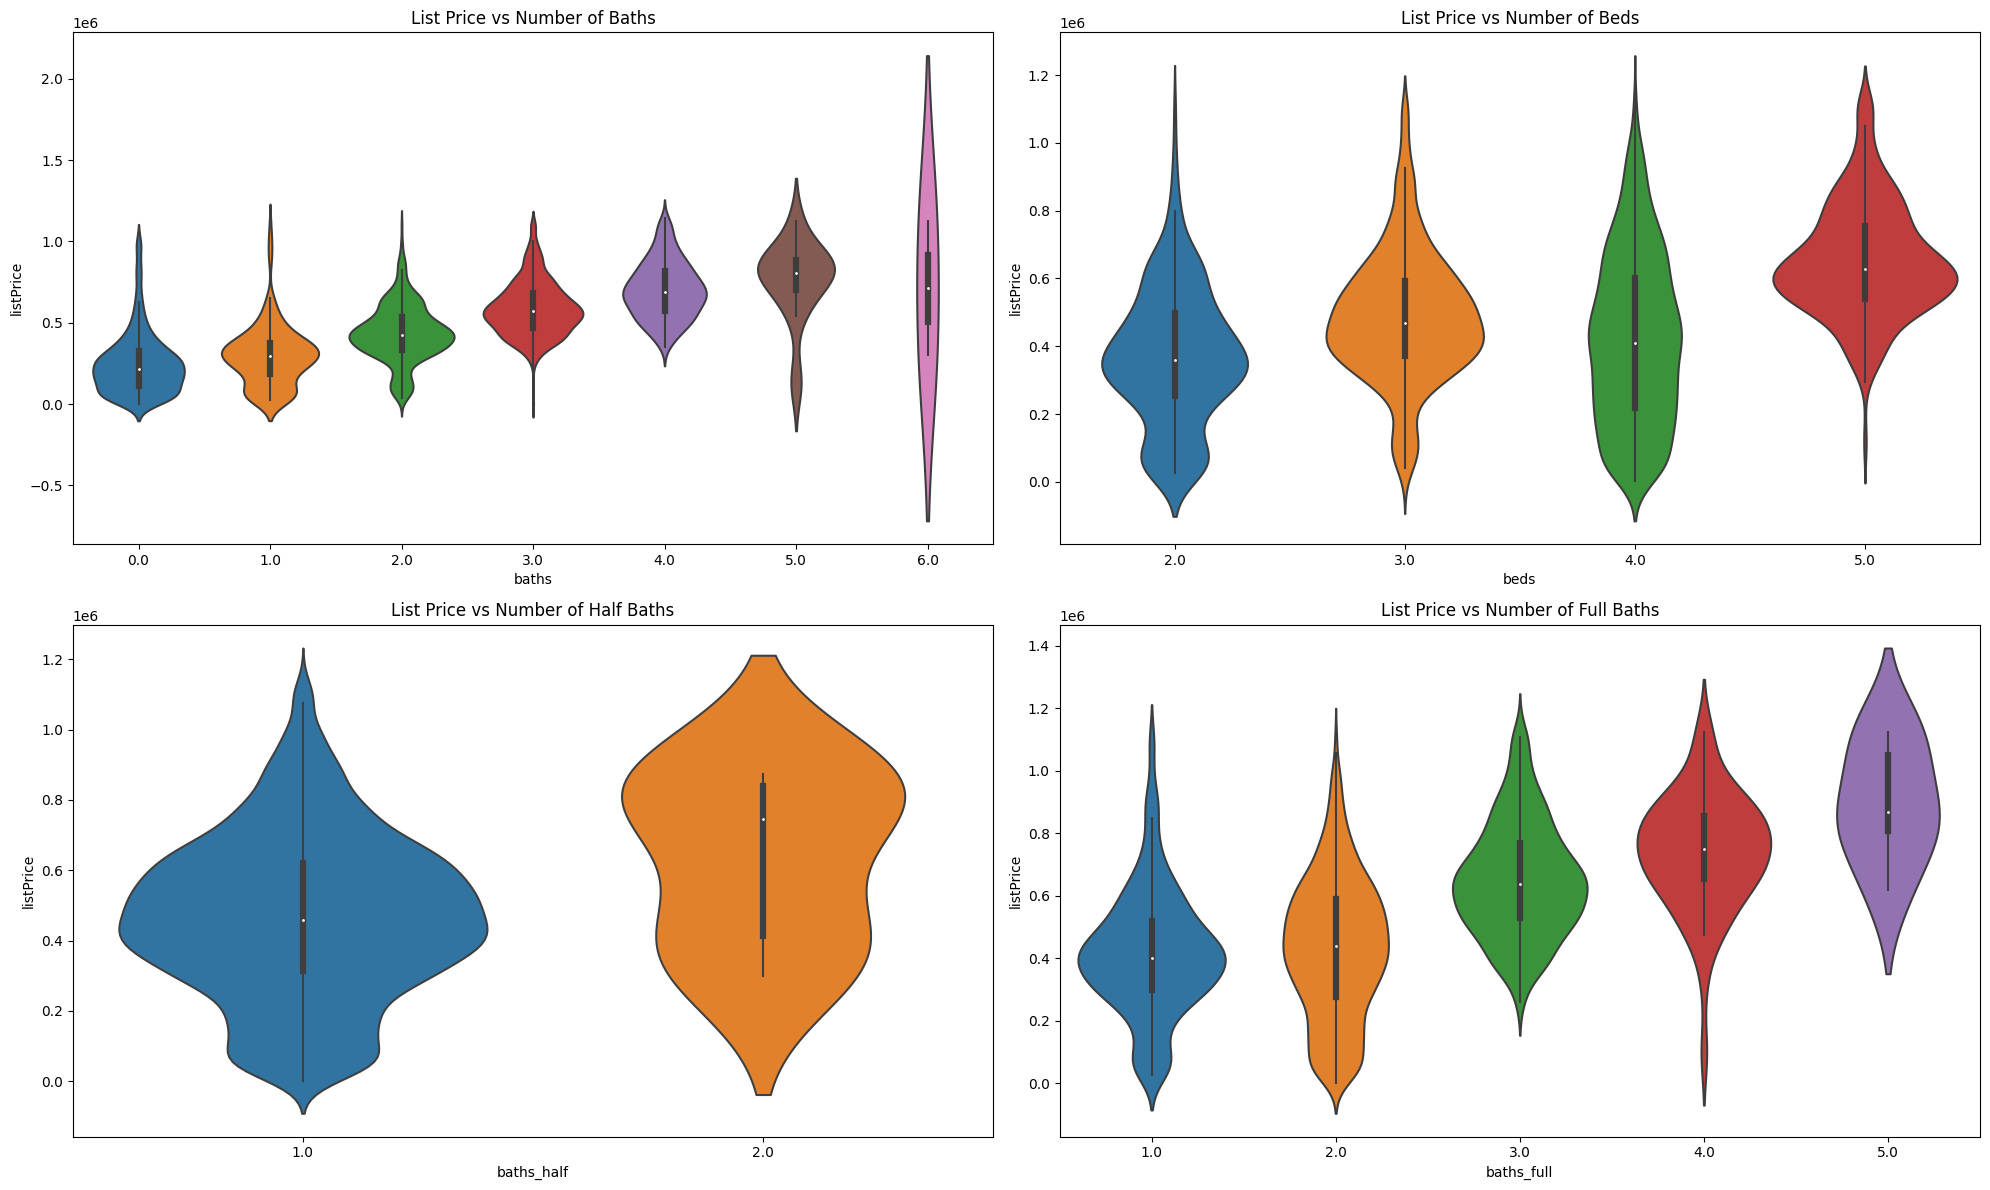

In [47]:
plt.figure(figsize=(20, 12))

# List Price vs Baths
plt.subplot(2, 2, 1)
sns.violinplot(x='baths', y='listPrice', data=df)
plt.title('List Price vs Number of Baths')

# List Price vs Beds
plt.subplot(2, 2, 2)
sns.violinplot(x='beds', y='listPrice', data=df)
plt.title('List Price vs Number of Beds')

# List Price vs Baths Half
plt.subplot(2, 2, 3)
sns.violinplot(x='baths_half', y='listPrice', data=df)
plt.title('List Price vs Number of Half Baths')

# List Price vs Baths Full
plt.subplot(2, 2, 4)
sns.violinplot(x='baths_full', y='listPrice', data=df)
plt.title('List Price vs Number of Full Baths')

plt.tight_layout()
plt.show()


# 5. Preparing Dataframe for Modelling <a id=5></a>

In [48]:
# lets drop some variable which we do not need them
df.drop(['lastSoldOn', 'stories'], axis=1, inplace=True)

In [49]:
df.head(1) # Validating Changes

,type,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,listPrice,status
1,single_family,1968,4.0,3.0,2.0,1.0,2.0,10.944277,3700.0,799000.0,for_sale


In [50]:
df_encoded = pd.get_dummies(df, drop_first=True, dtype='int')
# df_encoded = df.copy()

In [51]:
df_encoded.head(1)

,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,listPrice,type_farm,type_land,type_mobile,type_other,type_single_family,type_townhome,status_ready_to_build
1,1968,4.0,3.0,2.0,1.0,2.0,10.944277,3700.0,799000.0,0,0,0,0,1,0,0


## 5.1 Spliting Dataframe to X, y <a id=5.1></a>

In [52]:
X = df_encoded.drop('listPrice', axis=1)
y = df_encoded['listPrice']

In [53]:
print(X.shape)
print(y.shape)

(3445, 15)
(3445,)


## 5.2 Linear Regression Assumtions <a id=5.2></a>

### 5.2.1 Linearity <a id=5.2.1></a>

<Figure size 600x600 with 0 Axes>

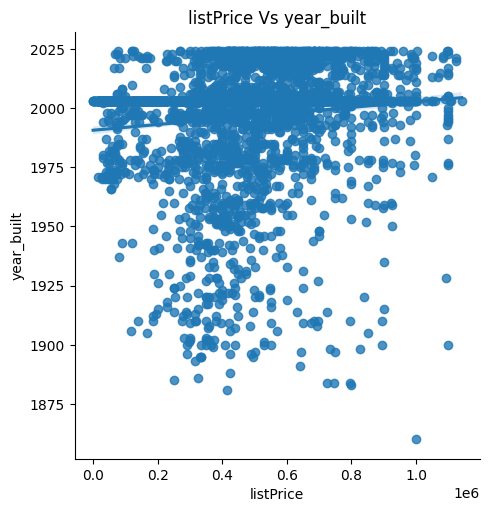

In [54]:
plt.figure(figsize=(6,6))
sns.lmplot(x='listPrice', y='year_built', data=df)
plt.title("listPrice Vs year_built")
plt.show()

<Figure size 600x600 with 0 Axes>

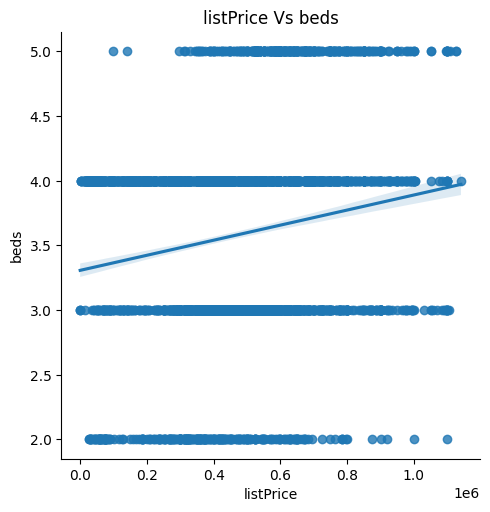

In [55]:
plt.figure(figsize=(6,6))
sns.lmplot(x='listPrice', y='beds', data=df)
plt.title("listPrice Vs beds")
plt.show()

<Figure size 600x600 with 0 Axes>

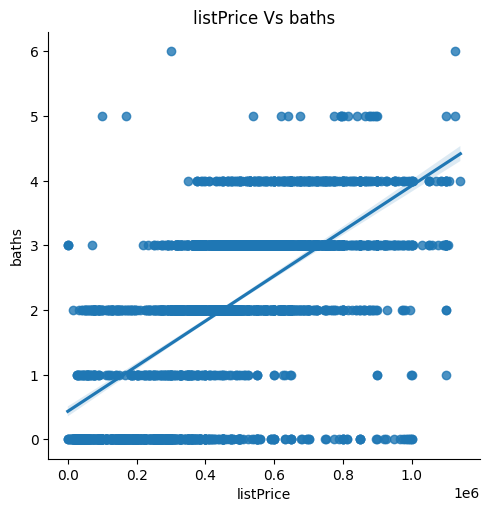

In [56]:
plt.figure(figsize=(6,6))
sns.lmplot(x='listPrice', y='baths', data=df)
plt.title("listPrice Vs baths")
plt.show()

<Figure size 600x600 with 0 Axes>

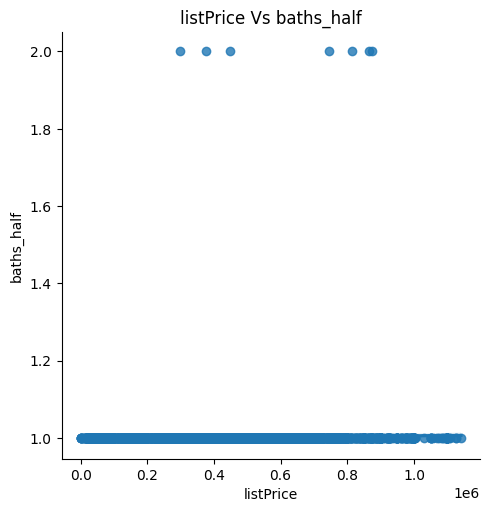

In [57]:
plt.figure(figsize=(6,6))
sns.lmplot(x='listPrice', y='baths_half', data=df)
plt.title("listPrice Vs baths_half")
plt.show()

<Figure size 600x600 with 0 Axes>

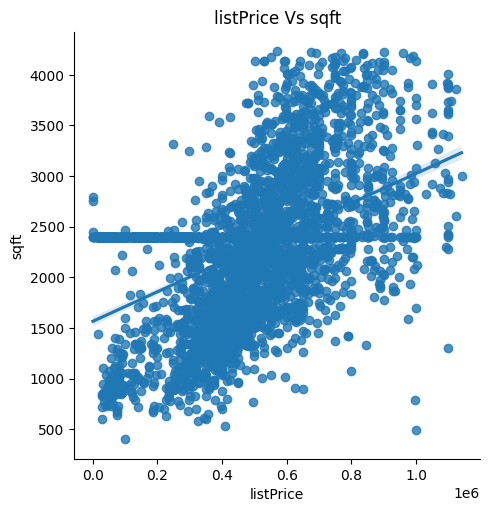

In [58]:
plt.figure(figsize=(6,6))
sns.lmplot(x='listPrice', y='sqft', data=df)
plt.title("listPrice Vs sqft")
plt.show()

<Figure size 600x600 with 0 Axes>

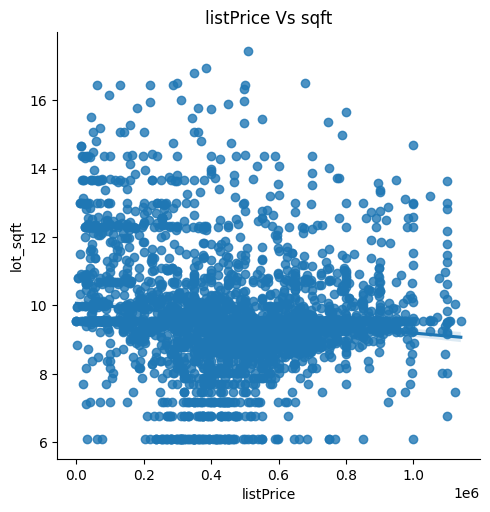

In [59]:
plt.figure(figsize=(6,6))
sns.lmplot(x='listPrice', y='lot_sqft', data=df)
plt.title("listPrice Vs sqft")
plt.show()

### 5.2.2 Homoscedasticity <a id=5.2.2></a>

In [60]:
import statsmodels.api as sm

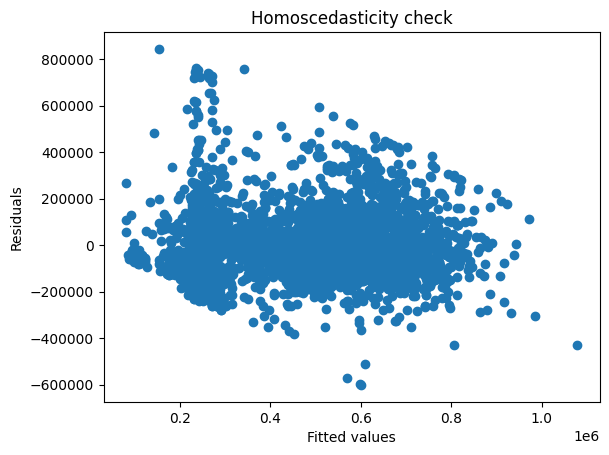

In [61]:
model = sm.OLS(y, X).fit()
residuals = model.resid
fitted = model.fittedvalues
plt.scatter(fitted, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity check')
plt.show()

### 5.2.3 Multivariate Normality <a id=5.2.3></a>

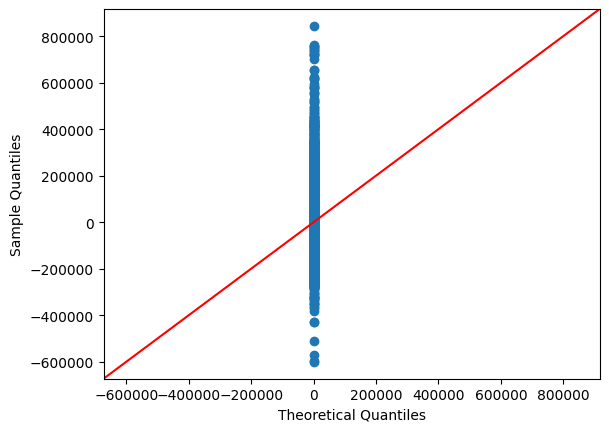

In [62]:
sm.qqplot(residuals, line ='45')
plt.show()

### 5.2.4 Autocorrelation <a id=5.2.4></a>

In [63]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model.resid)

1.9634561696211466

_A value of 1.964 indicates that there is little to no autocorrelation in the residuals.
This suggests that the residuals (errors) from  regression model are not showing a clear pattern over time, which is desirable in a well-fitting regression model._

### 5.2.5 Multicollinearity <a id=5.2.5></a>

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
# Create DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["feature"] = df_encoded.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_encoded.values, i) for i in range(len(df_encoded.columns))]

print(vif_data)

                  feature         VIF
0              year_built  564.616229
1                    beds   37.933283
2                   baths   29.126060
3              baths_full   19.736854
4              baths_half  484.588004
5                  garage   13.757783
6                lot_sqft   65.415308
7                    sqft   24.952751
8               listPrice   12.645712
9               type_farm    1.114374
10              type_land   16.049876
11            type_mobile    2.668744
12             type_other    1.101127
13     type_single_family   17.854354
14          type_townhome    3.570378
15  status_ready_to_build    1.174693


### VIF Interpretation:
- **Extremely High VIF (e.g., `year_built`, `baths_half`)**:
  - These features exhibit severe multicollinearity. Consider removing one of the correlated features or combining them into a single feature to reduce multicollinearity.

- **High VIF (e.g., `beds`, `baths`, `sqft`)**:
  - These features show significant multicollinearity. You might want to investigate further to understand which features are highly correlated and consider dropping or transforming them.

- **Moderate VIF (e.g., `listPrice`, `garage`)**:
  - These features have moderate multicollinearity. While they might not need immediate action, keep an eye on them during modeling.

- **Low VIF (e.g., `lot_sqft`, `type_farm`, `type_mobile`)**:
  - These features have minimal multicollinearity and are generally safe to keep in the model.

## 5.3 Combine baths, baths_full, and baths_half into one feature <a id=5.3></a>
_Feature Engineering in order to reduce Multicollinearity_

In [90]:
df_encoded['total_baths'] = df_encoded['baths'] + df_encoded['baths_full'] + (0.5 * df_encoded['baths_half'])
df_encoded = df_encoded.drop(columns=['baths', 'baths_full', 'baths_half'])

In [91]:
df_encoded.head()

,year_built,beds,garage,lot_sqft,sqft,listPrice,type_farm,type_land,type_mobile,type_other,type_single_family,type_townhome,status_ready_to_build,total_baths
1,1968,4.0,2.0,10.944277,3700.0,799000.0,0,0,0,0,1,0,0,5.5
2,1985,4.0,1.0,9.212338,3528.0,389900.0,0,0,0,0,1,0,0,6.5
3,1936,4.0,2.0,9.444068,2097.0,300000.0,0,0,0,0,1,0,0,4.5
4,2003,4.0,2.0,13.678627,2400.0,70000.0,0,1,0,0,0,0,0,2.5
5,1994,3.0,2.0,11.711522,1880.0,550000.0,0,0,1,0,0,0,0,4.5


## 5.4 Correlation <a id=5.4></a>

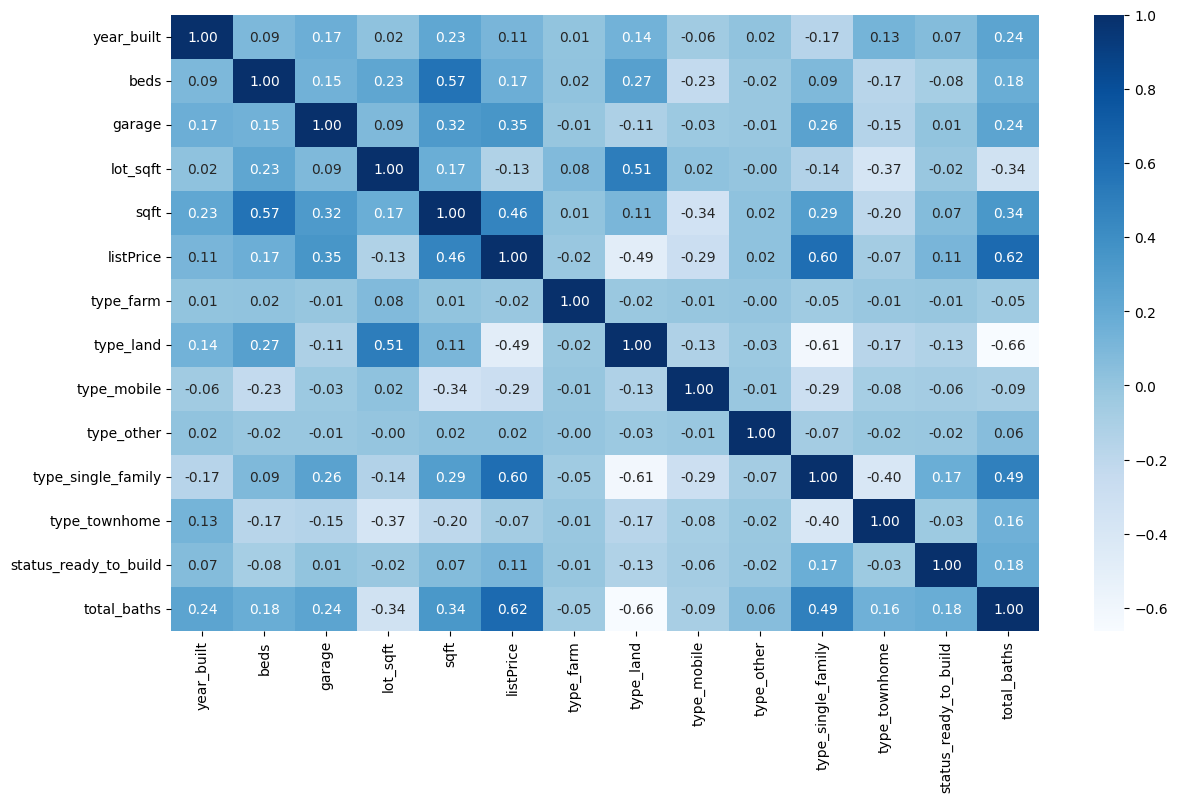

In [97]:
corr_matrix = df_encoded.corr(numeric_only=True)
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.show()

## 5.5 Modelling <a id=5.5></a>

### 5.5.1 Import Libraries <a id=5.5.1></a>

In [98]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

### 5.5.2 Linear Regression <a id=5.5.2></a>

In [99]:
X = df_encoded.drop(['listPrice'], axis=1).values
y = df_encoded['listPrice'].values
y = y.reshape(len(y), 1)

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

Mean Squared Error:  0.016398401486130126
R2 Score:  0.5959878207034504


### 5.5.3 Ridge Regression

In [101]:
# X = df_encoded.drop(['listPrice'], axis=1)
# y = df_encoded['listPrice']
X = df_encoded.drop(['listPrice'], axis=1).values
y = df_encoded['listPrice'].values
y = y.reshape(len(y), 1)

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

ridge = Ridge()

ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

Mean Squared Error:  0.016388039694767036
R2 Score:  0.5962431071661923


#### 5.5.3.1 GridsearchCV <a id=5.5.3.1></a>

In [102]:
ridge=Ridge()
# Define the parameter grid
param_grid_ridge = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 1.1, 1.5, 2, 3],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'fit_intercept': [True, False],
}

# Initialize GridSearchCV
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, scoring='neg_mean_squared_error', cv=5)

# Fit the model
grid_search_ridge.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for Ridge Regression: ", grid_search_ridge.best_params_)
print("Best cross-validation score for Ridge Regression: ", grid_search_ridge.best_score_)

Best parameters for Ridge Regression:  {'alpha': 1, 'fit_intercept': True, 'solver': 'sparse_cg'}
Best cross-validation score for Ridge Regression:  -0.016819749240810748


### 5.5.4 Polynomial Regression <a id=5.5.4></a>

In [103]:
X = df_encoded.drop(['listPrice'], axis=1).values
y = df_encoded['listPrice'].values
y = y.reshape(len(y), 1)

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

pf = PolynomialFeatures(degree=1)
X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.fit_transform(X_test)

model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

Mean Squared Error:  0.016398401486130122
R2 Score:  0.5959878207034504


### 5.5.5 ElasticNet <a id=5.5.5></a>

In [104]:
elasticnet = ElasticNet()

X = df_encoded.drop(['listPrice'], axis=1).values
y = df_encoded['listPrice'].values
y = y.reshape(len(y), 1)

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

elasticnet.fit(X_train, y_train)
y_pred = elasticnet.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

Mean Squared Error:  0.0406601057244241
R2 Score:  -0.001754831899128062


#### 5.5.5.1 GridSearchCV <a id=5.5.5.1></a>

In [105]:
# Define the model
elastic_net = ElasticNet()

# Define the parameter grid
param_grid_en = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    'fit_intercept': [True, False],
    'max_iter': [100, 200, 500, 1000, 1500],
    'precompute': [True, False],
    'selection': ['cyclic', 'random']
}

# Initialize GridSearchCV
grid_search_en = GridSearchCV(estimator=elastic_net, param_grid=param_grid_en, scoring='neg_mean_squared_error', cv=5)

# Fit the model
grid_search_en.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for Elastic Net Regression: ", grid_search_en.best_params_)
print("Best cross-validation score for Elastic Net Regression: ", grid_search_en.best_score_)

Best parameters for Elastic Net Regression:  {'alpha': 0.01, 'fit_intercept': False, 'l1_ratio': 0.1, 'max_iter': 100, 'precompute': True, 'selection': 'cyclic'}
Best cross-validation score for Elastic Net Regression:  -0.017819307611961894


In [106]:
params = grid_search_en.best_params_

In [107]:
elasticnet = ElasticNet(**params)

X = df_encoded.drop(['listPrice'], axis=1).values
y = df_encoded['listPrice'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

elasticnet.fit(X_train, y_train)
y_pred = elasticnet.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

Mean Squared Error:  21621345024.980083
R2 Score:  0.5908258707172661


### 5.5.6 RandomForest Regressor <a id=5.5.56></a>

In [108]:
X = df_encoded.drop(['listPrice', 'year_built', 'lot_sqft'], axis=1)
y = df_encoded['listPrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor()

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

Mean Squared Error:  22479572687.592445
R2 Score:  0.5745843022038339


#### 5.5.6.1 RandomizedSearchCV

In [109]:
from sklearn.model_selection import RandomizedSearchCV

# Define the model
random_forest = RandomForestRegressor()

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
}

# Initialize GridSearchCV
# grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, scoring='neg_mean_squared_error', cv=5)
random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, cv=10)

# Fit the model
# grid_search_rf.fit(X_train, y_train)
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for Random Forest Regression: ", random_search.best_params_)
print("Best cross-validation score for Random Forest Regression: ", random_search.best_score_)

Best parameters for Random Forest Regression:  {'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 40}
Best cross-validation score for Random Forest Regression:  0.6048040494423665


In [110]:
best_params = random_search.best_params_

X = df_encoded.drop(['listPrice', 'year_built', 'lot_sqft'], axis=1).values
y = df_encoded['listPrice'].values
y = y.reshape(len(y), 1)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf = RandomForestRegressor(**best_params)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

Mean Squared Error:  0.015342020850413782
R2 Score:  0.6220141771848071


### 5.5.7 Support Vector Regressor <a id=5.5.7></a>

In [111]:
from sklearn.svm import SVR

X = df_encoded.drop(['listPrice', 'year_built', 'lot_sqft'], axis=1).values
y = df_encoded['listPrice'].values
y = y.reshape(len(y), 1)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr = SVR()

svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

Mean Squared Error:  0.015982451136869334
R2 Score:  0.6062357102447664


### Gradient Descent Regressor

In [112]:
from sklearn.linear_model import SGDRegressor

X = df_encoded.drop(['listPrice', 'year_built', 'lot_sqft'], axis=1).values
y = df_encoded['listPrice'].values
y = y.reshape(len(y), 1)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


sgd_regressor = SGDRegressor()
sgd_regressor.fit(X_train, y_train)

y_pred = sgd_regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

Mean Squared Error:  0.017990528561809858
R2 Score:  0.5567621236069091


In [113]:
from sklearn.model_selection import RandomizedSearchCV
sgd = SGDRegressor()
# Define the parameter grid
param_dist_sgd = {
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'l1_ratio': [0.0, 0.15, 0.5, 0.7, 1.0],
    'max_iter': [1000, 2000, 3000],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.001, 0.01, 0.1],
    'power_t': [0.25, 0.5, 0.75]
}

# Initialize RandomizedSearchCV
random_search_sgd = RandomizedSearchCV(estimator=sgd, param_distributions=param_dist_sgd, n_iter=50, scoring='neg_mean_squared_error', cv=5, random_state=42)

# Fit the model
random_search_sgd.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for SGDRegressor using RandomizedSearchCV: ", random_search_sgd.best_params_)
print("Best cross-validation score for SGDRegressor using RandomizedSearchCV: ", random_search_sgd.best_score_)


Best parameters for SGDRegressor using RandomizedSearchCV:  {'power_t': 0.75, 'penalty': 'l1', 'max_iter': 3000, 'learning_rate': 'adaptive', 'l1_ratio': 0.0, 'eta0': 0.1, 'alpha': 0.0001}
Best cross-validation score for SGDRegressor using RandomizedSearchCV:  -0.017009064831688195


In [114]:
best_params = random_search_sgd.best_params_
X = df_encoded.drop(['listPrice', 'year_built', 'lot_sqft'], axis=1).values
y = df_encoded['listPrice'].values
y = y.reshape(len(y), 1)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


sgd_regressor = SGDRegressor(**best_params)
sgd_regressor.fit(X_train, y_train)

y_pred = sgd_regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

Mean Squared Error:  0.016642386827317328
R2 Score:  0.5899766830024478


## Decision Tree

In [115]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)
X = df_encoded.drop(['listPrice', 'year_built', 'lot_sqft'], axis=1).values
y = df_encoded['listPrice'].values
y = y.reshape(len(y), 1)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

Mean Squared Error:  0.025558791524192156
R2 Score:  0.3703006312774506


In [116]:
# Define the model
decision_tree = DecisionTreeRegressor()

# Define the parameter grid
param_grid_dt = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=decision_tree, param_grid=param_grid_dt, scoring='neg_mean_squared_error', cv=5)

# Fit the model
grid_search_dt.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for Decision Tree Regression: ", grid_search_dt.best_params_)
print("Best cross-validation score for Decision Tree Regression: ", grid_search_dt.best_score_)

Best parameters for Decision Tree Regression:  {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}
Best cross-validation score for Decision Tree Regression:  -0.017654413686375735


In [159]:
best_params = grid_search_dt.best_params_

from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(**best_params)
X = df_encoded.drop(['listPrice', 'year_built', 'lot_sqft'], axis=1).values
y = df_encoded['listPrice'].values
y = y.reshape(len(y), 1)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

Mean Squared Error:  0.01606356940838597
R2 Score:  0.6042371758337186


### DecisionTree Cross Validation

In [161]:
from sklearn.model_selection import cross_val_score

# Using the best parameters from GridSearchCV
best_params = grid_search_dt.best_params_

# Create a new SGDRegressor with the best parameters
regressor = DecisionTreeRegressor(**best_params)

# Perform cross-validation
scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=10)

# Print the cross-validation scores
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.57351889 0.61061092 0.6297226  0.47085518 0.60552666 0.49931267
 0.58312607 0.60594048 0.59593812 0.55261416]
Mean cross-validation score:  0.5727165744190138


## GradientBoostingRegressor

In [142]:
from sklearn.ensemble import GradientBoostingRegressor

X = df_encoded.drop('listPrice', axis=1).values
y = df_encoded['listPrice'].values
y = y.reshape(len(y), 1)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr_model = GradientBoostingRegressor()

# Training the model
gbr_model.fit(X_train, y_train)

# Making predictions
y_pred = gbr_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.015469139062262813
R^2 Score: 0.6188823288860053
